# Extraccion de las estrellas en el cumulo:


INFO: Query finished. [astroquery.utils.tap.core]
     source_id              ra         ...   bp_rp    radial_velocity
                           deg         ...    mag          km / s    
------------------- ------------------ ... ---------- ---------------
4421576266097389952  229.9248970253305 ...  1.0675793              --
4421576300457139840 229.94068325777778 ... 0.78705215              --
4421576304757248256 229.94221483620933 ...  0.7966461              --
4421576403536346752 229.89095417369225 ...  1.3464642              --
4421576575335121280 229.92176345579057 ... 0.93577766              --


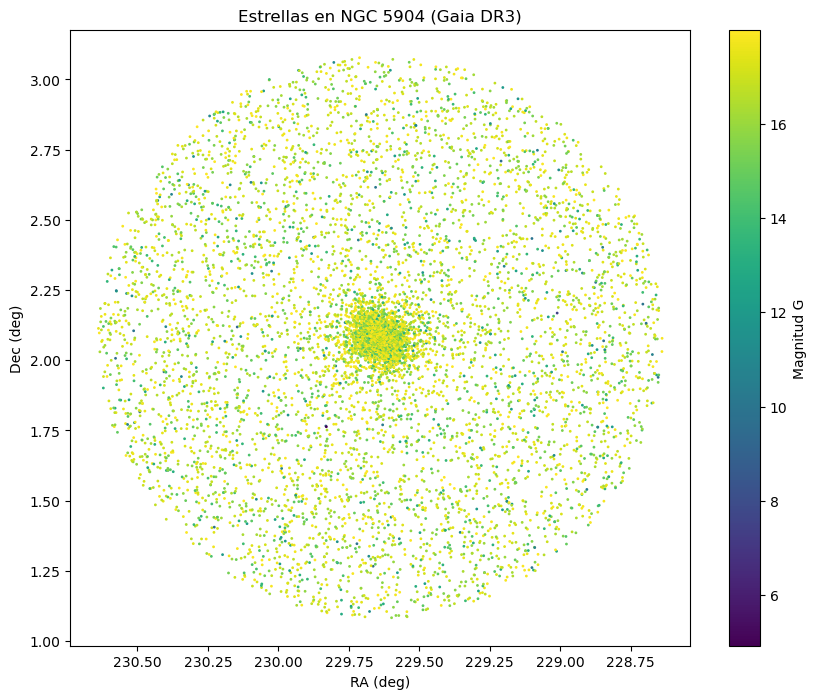

In [1]:
from astroquery.gaia import Gaia
import numpy as np
import matplotlib.pyplot as plt


query = """
SELECT 
    source_id, ra, dec, parallax, pmra, pmdec, 
    phot_g_mean_mag, bp_rp, radial_velocity
FROM gaiadr3.gaia_source
WHERE 
    1 = CONTAINS(
        POINT('ICRS', 229.638417, 2.081028),
        CIRCLE('ICRS', ra, dec, 1.0)
    )
    AND phot_g_mean_mag < 18
"""

# Ejecutar la consulta
job = Gaia.launch_job_async(query)
results = job.get_results()

# Mostrar las primeras 5 filas
print(results[:5])

# Guardar resultados en CSV
results.write('ngc5904_gaia_dr3.csv', format='csv', overwrite=True)

# Opcional: Gráfico de posición de las estrellas
plt.figure(figsize=(10, 8))
plt.scatter(results['ra'], results['dec'], s=1, c=results['phot_g_mean_mag'], cmap='viridis')
plt.colorbar(label='Magnitud G')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Estrellas en NGC 5904 (Gaia DR3)')
plt.gca().invert_xaxis()  # Para que RA aumente hacia la izquierda (como en imágenes astronómicas)
plt.show()

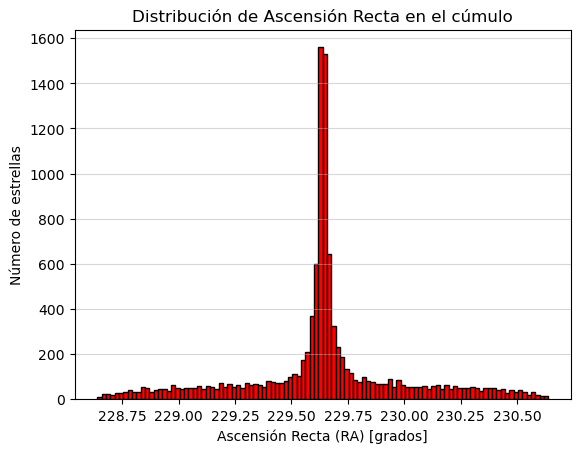

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer la columna 'ra' de la tabla results
ra_values = results['ra']  # Asumiendo que 'results' es tu tabla de Astropy o pandas

# Crear el histograma
plt.hist(ra_values, bins=int(np.sqrt(len(ra_values))), color='red', edgecolor='black')

# Personalización del gráfico
plt.xlabel('Ascensión Recta (RA) [grados]')
plt.ylabel('Número de estrellas')
plt.title('Distribución de Ascensión Recta en el cúmulo')
plt.grid(axis='y', alpha=0.5)

# Mostrar el gráfico
plt.show()

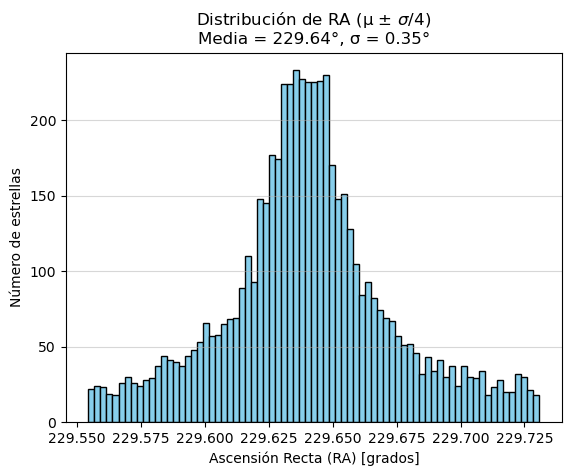

Total de estrellas: 10947
Estrellas dentro de μ ± σ: 5704 (52.1%)


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Extraer los valores de RA
ra_values = results['ra']  # Asume que 'results' es tu tabla (Astropy, pandas, etc.)

# 2. Calcular media (μ) y desviación estándar (σ) de RA
mean_ra = np.mean(ra_values)
std_ra = np.std(ra_values)

# 3. Crear máscara para datos dentro de μ ± σ
mask = (ra_values >= mean_ra - std_ra/4) & (ra_values <= mean_ra + std_ra/4)
filtered_ra = ra_values[mask]  # Datos filtrados

# 4. Histograma de los datos filtrados
plt.hist(filtered_ra, bins=int(np.sqrt(len(filtered_ra))), color='skyblue', edgecolor='black')
plt.xlabel('Ascensión Recta (RA) [grados]')
plt.ylabel('Número de estrellas')
plt.title(f'Distribución de RA (μ ± $σ/4$)\nMedia = {mean_ra:.2f}°, σ = {std_ra:.2f}°')
plt.grid(axis='y', alpha=0.5)
plt.show()

# Opcional: Verificar cuántas estrellas se filtraron
print(f"Total de estrellas: {len(ra_values)}")
print(f"Estrellas dentro de μ ± σ: {len(filtered_ra)} ({len(filtered_ra)/len(ra_values)*100:.1f}%)")

# Diagrama color magnitud - magnitud aparente - mangitud absoluta

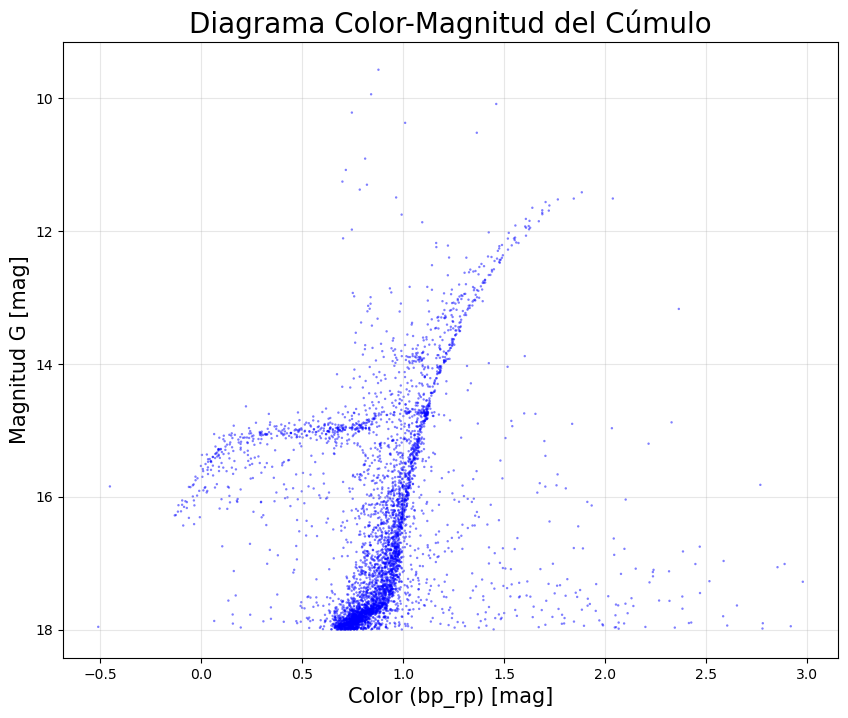

In [48]:
# Tomamos los datos filtrados anteriormente y hacemos el diagrama
import matplotlib.pyplot as plt
import numpy as np

# 1. Aplicar la máscara existente a las columnas 'bp_rp' y 'phot_g_mean_mag'
filtered_bp_rp = results['bp_rp'][mask]  # Índice de color
filtered_g_mag = results['phot_g_mean_mag'][mask]  # Magnitud en banda G

# 2. Crear el diagrama
plt.figure(figsize=(10, 8))
plt.scatter(
    filtered_bp_rp,
    filtered_g_mag,
    s=3,  # Tamaño de los puntos
    c='blue',  # Color
    alpha=0.5,  # Transparencia
    edgecolors='none'  # Sin bordes
)

# 3. Personalizar el gráfico (¡invertir el eje Y!)
plt.gca().invert_yaxis()  # Magnitudes más brillantes arriba
plt.xlabel('Color (bp_rp) [mag]', fontsize=15)
plt.ylabel('Magnitud G [mag]', fontsize=15)
plt.title('Diagrama Color-Magnitud del Cúmulo', fontsize=20)
plt.grid(alpha=0.3)

# 4. Opcional: Añadir líneas de referencia (ej. secuencia principal)
# plt.axvline(x=0.5, color='red', linestyle='--', label='Secuencia principal')
# plt.legend()

plt.show()

In [ ]:
## para esta parte me equivoque pq era solo para las estrellas de la HB, en este caso estoy considerando todas las estrellas del cumulo. tenggo que hacer una mask 
## que restringa solo las estrellas con dec y ra que pertenezcan a la HB.

import numpy as np

# 1. Aplicar la máscara a las magnitudes G
g_mags = results['phot_g_mean_mag'][mask]

# 2. Convertir magnitudes individuales a flujos
fluxes = 10 ** (-0.4 * g_mags)

# 3. Sumar todos los flujos
total_flux = np.sum(fluxes)

# 4. Convertir el flujo total a magnitud aparente del cúmulo
cluster_mag = -2.5 * np.log10(total_flux)

print(f"Magnitud aparente del cúmulo en banda G: {cluster_mag:.2f}")

Magnitud aparente del cúmulo en banda G: 5.86


In [50]:
# Datos de entrada (modifica con tus valores reales)
m = cluster_mag  # Magnitud aparente del cúmulo (calculada previamente)
d_kpc = 7.4      # Distancia en kiloparsecs

# Cálculo de la magnitud absoluta
M = m - 5 * np.log10(d_kpc * 1000) + 5  # Convertir kpc a parsecs (1 kpc = 1000 pc)

print(f"Magnitud absoluta del cúmulo (banda G): {M:.2f}")

Magnitud absoluta del cúmulo (banda G): -8.48
